<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/Trilegal_Data_Visualization/NGC6822_Trilegal_and_INF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

fatal: destination path 'NGC_6822' already exists and is not an empty directory.


In [13]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

## Preparing data

In [14]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.78  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [15]:
file_address = '/content/NGC_6822/Data/final_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [16]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,15.410,S,1.910
2,10784.00,296.215450,-14.834690,17.250,15.420,S,1.830
3,11004.00,296.273410,-14.808610,17.400,15.490,S,1.910
4,11029.00,296.283080,-14.804970,17.260,15.440,S,1.820
5,12050.00,296.254270,-14.817640,17.970,15.920,S,2.050
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.272,C,1.778
379,89.99,296.003693,-14.974893,18.192,16.430,C,1.762
380,89.99,297.181274,-14.445981,18.330,16.512,C,1.818


In [17]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [18]:
X = (df['J-Ks'])
Y = (df['Ks'])

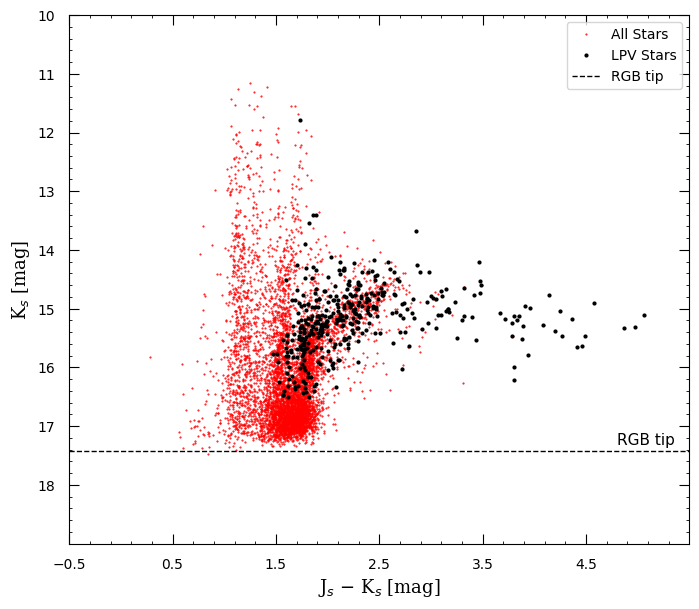

In [19]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'r.', markersize = '1', label = 'All Stars')
plt.plot(X, Y,'k.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
plt.savefig('CMD-With_Whitelock.jpeg', bbox_inches='tight', dpi = 400)

# Radius

In [20]:
# DCG : Distance from Centeral of Galaxy
Ra_center = 296.23
Dec_center = -14.80167
df['DCG'] = ((df['Ra(J2000) deg']-(Ra_center))**2 + (df['Dec(J2000) deg']-(Dec_center))**2)**0.5

(array([197., 132.,  41.,   5.,   0.,   1.,   3.,   0.,   1.,   2.]),
 array([0.00600083, 0.10696043, 0.20792003, 0.30887963, 0.40983923,
        0.51079882, 0.61175842, 0.71271802, 0.81367762, 0.91463722,
        1.01559681]),
 <a list of 10 Patch objects>)

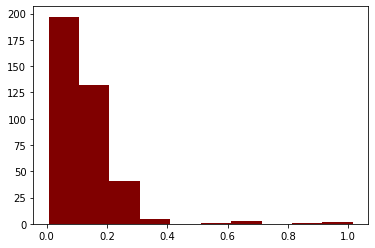

In [21]:
plt.hist(df['DCG'], color='maroon')

In [22]:
print('Maximum distance from center of galaxy is : ' + str( max(df['DCG'])))

Maximum distance from center of galaxy is : 1.0155968136012021


# TRilegal

In [23]:
file_address = '/content/NGC_6822/Data/final_cleaned_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [24]:
df_trilegal = pd.read_csv('/content/NGC_6822/Trilegal_Data_Visualization/NGC6822_Trilegal_Data.csv')

In [25]:
df_trilegal.head()

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,U,B,V,R,I,J,H,K,Mact
0,1,7.29,0.45,0.05555,-2.464,3.449,4.391,10.0,0.034,0.0,20.931,27.863,25.930,24.114,22.606,20.692,18.942,18.421,18.113,0.056
1,1,7.37,0.09,0.06305,-2.432,3.456,4.440,6.8,0.015,0.0,17.651,24.348,22.471,20.684,19.221,17.363,15.674,15.153,14.851,0.063
2,1,7.37,0.27,0.18841,-2.154,3.522,4.901,9.3,0.031,0.0,19.455,24.350,22.932,21.389,20.270,18.905,17.644,17.096,16.843,0.188
3,1,7.39,0.37,0.02599,-3.040,3.360,4.278,7.4,0.019,0.0,19.769,29.499,27.061,24.971,22.871,20.411,17.655,17.118,16.690,0.026
4,1,7.53,-0.25,0.38215,-1.639,3.588,4.957,10.4,0.036,0.0,19.268,22.811,21.705,20.369,19.453,18.599,17.627,17.021,16.850,0.382


In [35]:
X_c = (15.25 - Aj) - (13.92 - Ak)
Y_c = (13.92 - Ak)
X = (df['J-Ks'])
Y = (df['Ks'])

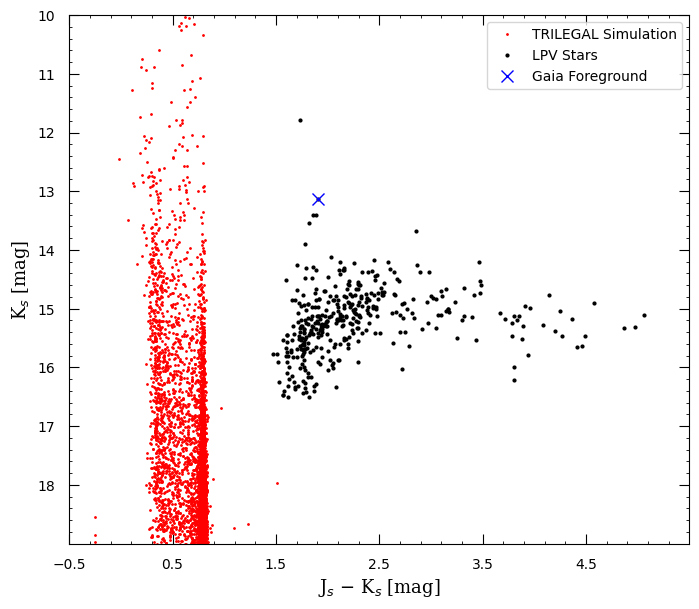

In [40]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_trilegal['J']) - (df_trilegal['K']), (df_trilegal['K']) ,'r.', markersize = '2', label = 'TRILEGAL Simulation')
plt.plot(X, Y,'k.', markersize = '4', label = 'LPV Stars')
plt.plot(X_c , Y_c , 'bx', markersize = '8' , label = 'Gaia Foreground')

#RGBT
#plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
#plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
plt.savefig('Trilegal_CMD.jpeg', bbox_inches='tight', dpi = 400)